### תיאור כללי של הדאטא:

ה-dataset נלקח מנתוני לשכת מפקד האוכלוסין של ארצות הברית משנת 1994 וכולל שימוש בפרטים אישיים כדי לחזות אם אדם ירוויח יותר או פחות מ-$50,000 בשנה.
המאגר כולל 48,842 רשומות.
לינק ל-database:   
https://www.kaggle.com/wenruliu/adult-income-dataset


### רשימת העמודות בקובץ

Age (גיל) -משתנה רציף, מתאר את גיל האדם.

Workclass -משתנה קטגוריאלי - מתאר את סוג העסקה של האדם (כגון בעלי חברה בע"מ, שכיר בחברה פרטית וכו').

Fnlwgt -משתנה רציף, מתאר את משקל הדגימה.

 Education - (השכלה) -משתנה קטגוריאלי - מתאר את רמת ההשכלה של האדם (כגון בעל תואר ראשון, שני וכו').
 
Education-num - (השכלה רציף) -משתנה רציף - מתאר את רמת ההשכלה באופן רציף. מספר שלם גדול או שווה ל-0.

Marital-status -משתנה קטגוריאלי - מתאר את הסטטוס המשפחתי של האדם.

Occupation - (תעסוקה) -משתנה קטגוריאלי - מתאר את סוג המשרה אותה מאייש האדם.

Income - משתנה בינארי המציין האם אדם מרוויח יותר מ-$50,000 בשנה או לא.

Native-country - משתנה קטגוריאלי המציין את ארץ המוצא של האדם.

Hours-per-week - משתנה רציף המציין כמות השעות שאדם דיווח לעבודה בשבוע.

Capital-loss – משתנה רציף המציין הפסד הון לאדם פרטי. מספר שלם גדול או שווה ל-0.

Capital-gain - משתנה רציף המציין רווח הון לאדם פרטי. מספר שלם גדול או שווה ל-0.

Gender– משתנה בינארי המציין את מין האדם. 1-גבר 0-אישה.

Race – משתנה קטגוריאלי הציין את הגזע של האדם.

Relationship - משתנה קטגוריאלי הציין את הקשר של האדם ביחס לסובבים. לדוגמה, אדם יכול להיות בעל. לכל ערך יש רק מאפיין מערכת יחסים אחד והוא מיותר במידה מסוימת בהתחשב בעמודת מצב משפחתי. 


###  התאמת ה- dataset לעבודה (מחיקת ערכים חסרים, שינוי ערכי העמודות)

In [1]:
#Reading a CSV file into pandas Dataframe
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
# Removing missing values
missing_values = ["n/a", "na", "--","?"]
df = pd.read_csv("adult.csv",sep=",", na_values = missing_values)
df=df.dropna()
# Reducing dataset size to 4000 samples.
df=df.sample(n = 4000)
# Converting string columns to binary.
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
12639,49,Private,207772,HS-grad,9,Divorced,Tech-support,Unmarried,White,1,0,0,40,United-States,0
14596,45,Self-emp-not-inc,172822,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,1,3411,0,40,United-States,0
2518,49,Private,304864,Some-college,10,Divorced,Tech-support,Unmarried,Black,0,0,0,35,United-States,0
29451,54,Self-emp-not-inc,71344,Masters,14,Divorced,Prof-specialty,Not-in-family,White,1,0,0,50,United-States,1
37256,63,State-gov,99823,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,32,United-States,0


### ניתוח תיאורי ראשוני של הנתונים


In [2]:
# Display important statistical values
df[['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.00000,4000.000000
mean,38.508500,1.894895e+05,10.110750,1272.593750,91.11000,40.919000
std,13.106768,1.057733e+05,2.569365,8431.895768,408.70876,11.963767
min,17.000000,1.975200e+04,1.000000,0.000000,0.00000,2.000000
25%,28.000000,1.169032e+05,9.000000,0.000000,0.00000,40.000000
50%,37.000000,1.791880e+05,10.000000,0.000000,0.00000,40.000000
75%,47.000000,2.386812e+05,13.000000,0.000000,0.00000,45.000000
max,90.000000,1.125613e+06,16.000000,99999.000000,3175.00000,99.000000


<ipython-input-29-2414a0154aae>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week'],ax=ax)


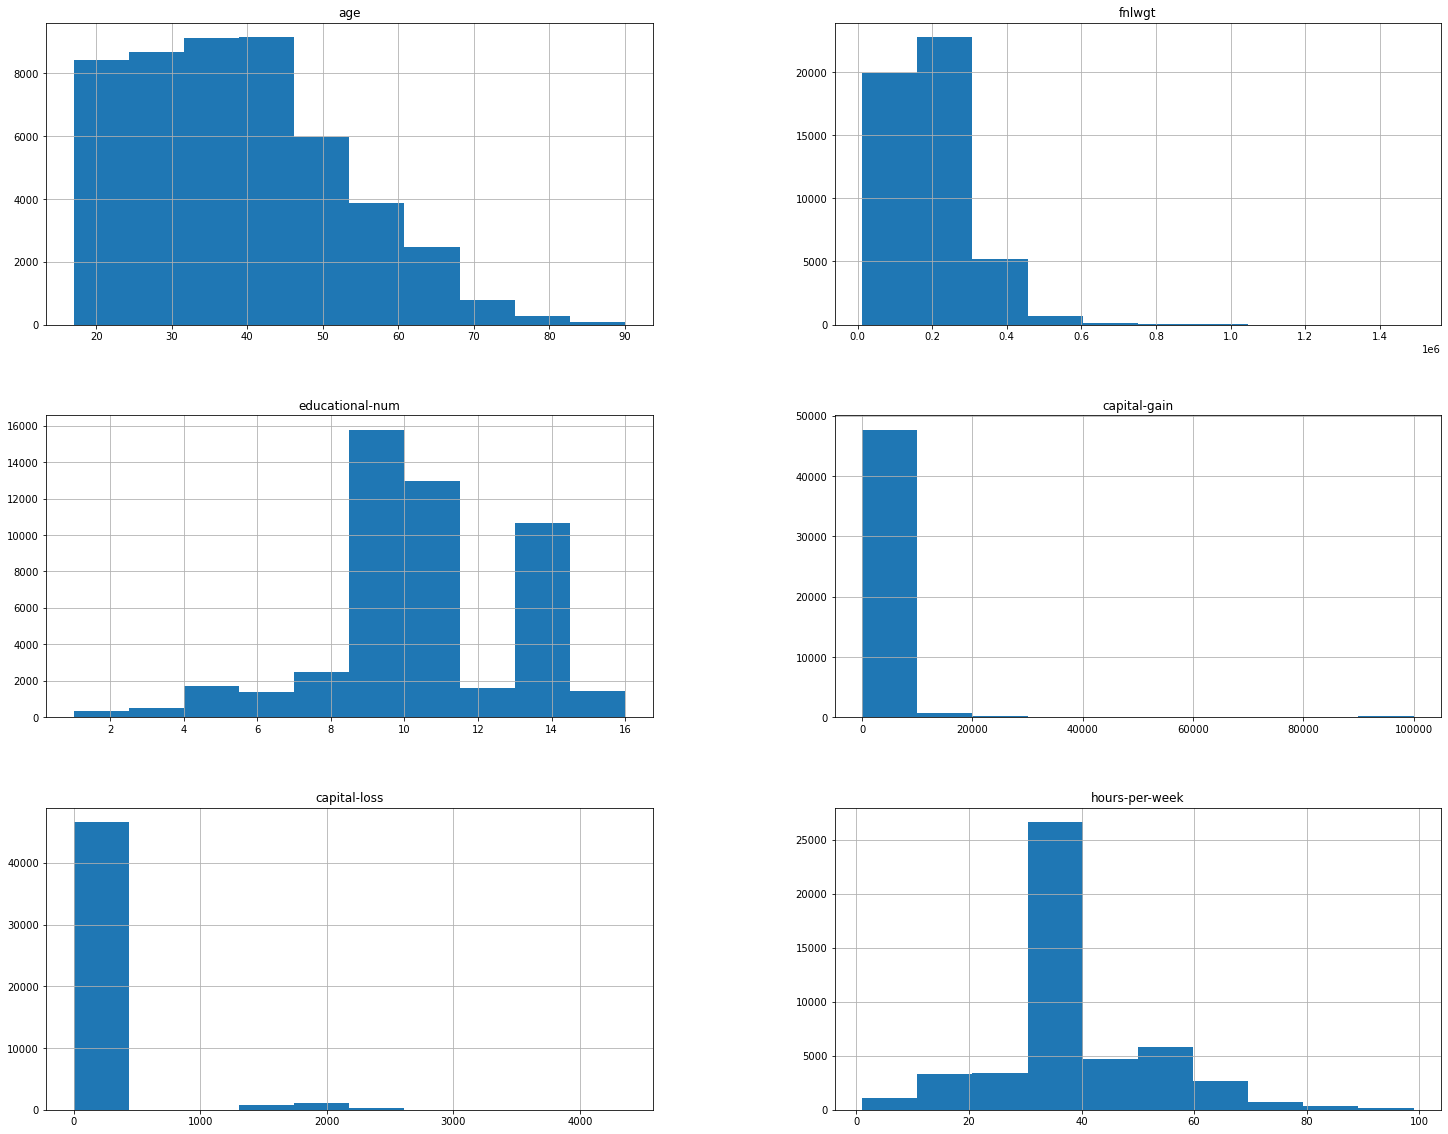

In [29]:
# Show distribution of numerical features in graphical way
fig = plt.figure(figsize = (25,20))
ax = fig.gca()
df.hist(['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week'],ax=ax)
plt.show()

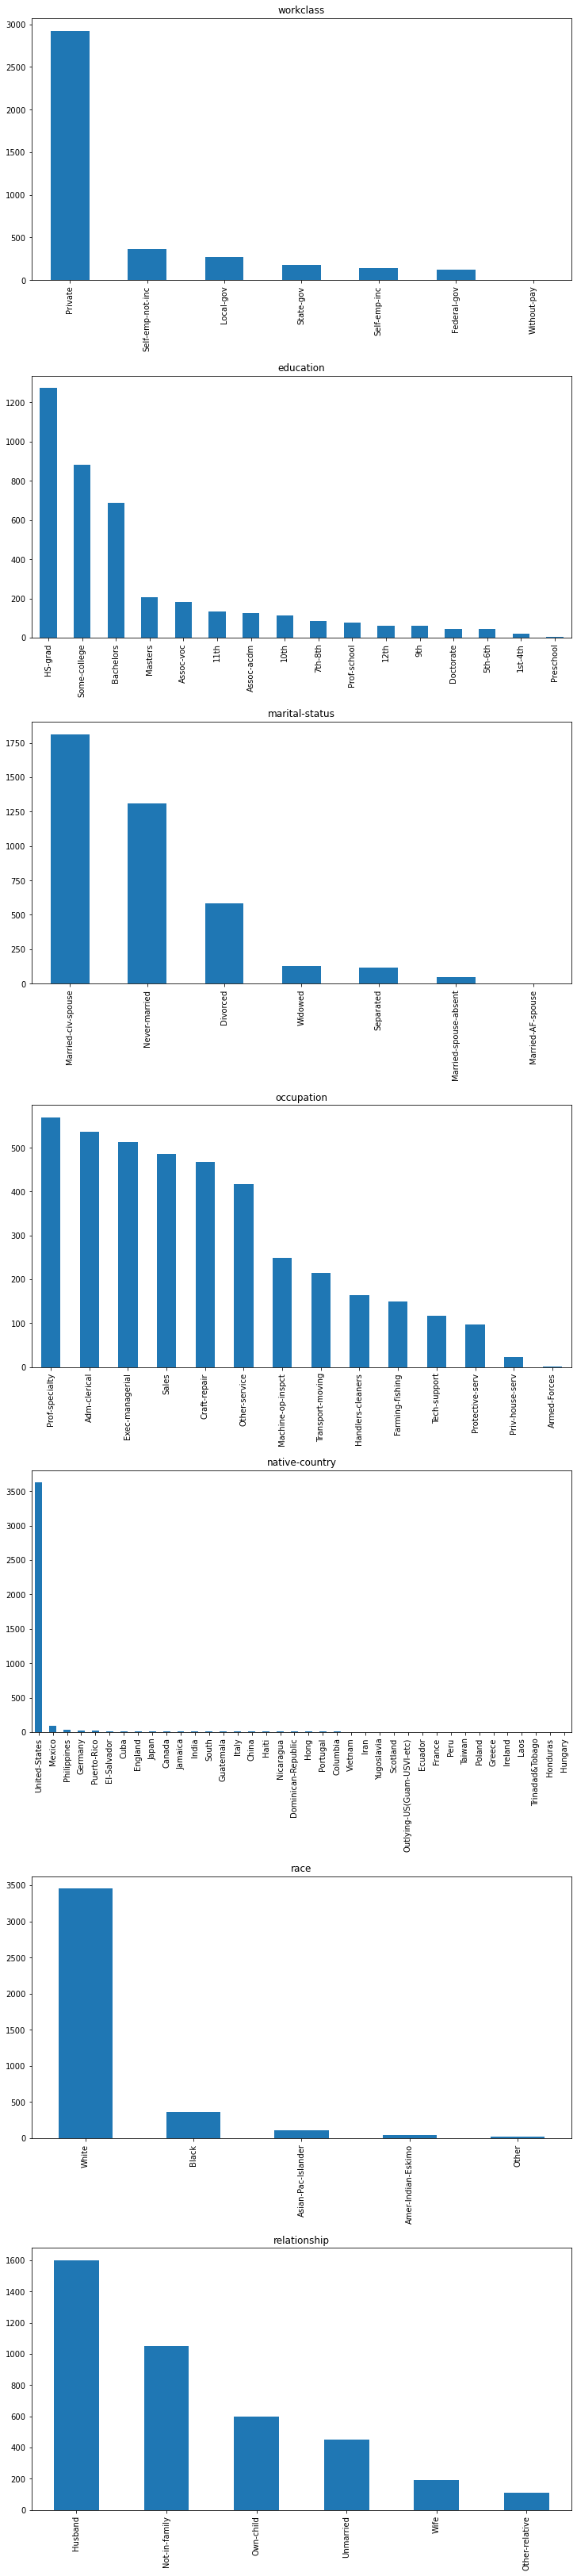

In [4]:
# Show distribution of categrical features in graphical way
categorical_features = ['workclass','education','marital-status','occupation','native-country','race','relationship']
fig, ax = plt.subplots(ncols=1, nrows=7,figsize=(10,45),constrained_layout=True)
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
plt.show()

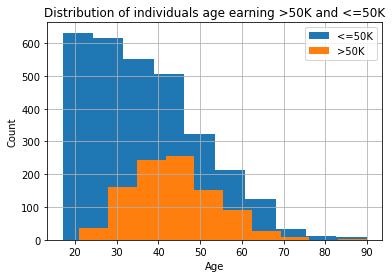

In [5]:
# Distribution of individuals age earning >50K and <=50K. 
df.groupby('income')['age'].hist()
plt.legend(np.array(["<=50K", ">50K"]))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Distribution of individuals age earning >50K and <=50K")
plt.show()

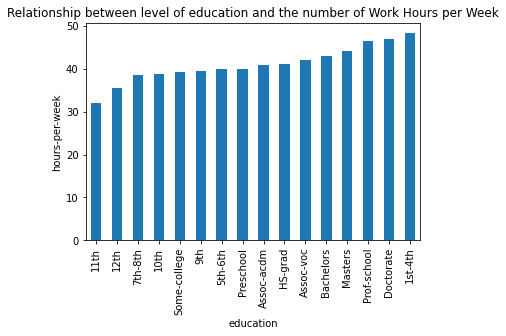

In [6]:
# Relationship between level of education and the number of working hours 
df.groupby("education")["hours-per-week"].mean().sort_values().plot.bar()
plt.ylabel('hours-per-week') 
plt.title("Relationship between level of education and the number of Work Hours per Week")
plt.show()

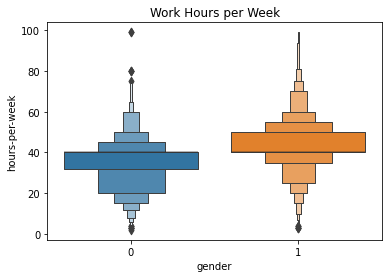

In [7]:
# Work Hours per Week depending on gender.
import seaborn as sns
sns.boxenplot(x='gender',y='hours-per-week',data=df)
plt.title("Work Hours per Week")
plt.show()

### ל-dataset יש כ-7% ערכים חסרים. (הערכים חסרים יוצגו כ-"?" ופולטרו בהתחלה). המידע נלקחת מהאתר:   http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

### כמו שניתן לראות מההסטוגמות של משתנים רציפים, יש ערכים חריגים בעמודה "capital-gain". כמו כן, לפי הזנב הארוך של ההתפלגות של העמודה "fnlwgt" גם ניתן להבין שיש ערכים חריגים בעמודה. 


In [21]:
# Count Missing values represented as "?" in dataset
df = pd.read_csv("adult.csv",sep=",")
df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [22]:
# Validation that there is no Missing values represented as nan,NAN ect.
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

###  שאלות המחקר
האם עליה בגיל גורמת לירידה במספר שעות העבודה בשבוע לאדם?

האם עליה בהשכלה גורמת לעליה בהסתברות שההכנסה גדולה מ50 אלף?

האם בקרב בעלי השכלה 14 ומעלה (תואר שני ומעלה) ההכנסה בהכרח גדולה מ50 אלף?
 